In [60]:
%matplotlib inline

import pandas

import pgdata

db = pgdata.connect()

# get salmon records that aren't in waterbodies
sql = """SELECT 
           fish_obsrvtn_distinct_id,
           edge_description, 
           waterbody_type,
           vertex_from_elevation,
           vertex_to_elevation,
           vertex_length,
           vertex_slope,
           segment_from_elevation,
           segment_to_elevation,
           segment_length,
           segment_slope,
           species_code,
           species_name
         FROM temp.obs_spp_by_slope 
         WHERE waterbody_type NOT IN ('X', 'L', 'W')
         AND species_code IN ('CH', 'CM', 'CO', 'PK', 'SK')
         ORDER BY fish_obsrvtn_distinct_id, species_code
"""
df = pandas.read_sql_query(sql, db.engine)

In [61]:
df.head()

,fish_obsrvtn_distinct_id,edge_description,waterbody_type,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope,species_code,species_name
0,5,"Construction line, double line river, main flow",R,227.76,227.76,117.76,0.00,227.763,229.251,905.92,0.16,CH,Chinook Salmon
1,5,"Construction line, double line river, main flow",R,227.76,227.76,117.76,0.00,227.763,229.251,905.92,0.16,CO,Coho Salmon
2,5,"Construction line, double line river, main flow",R,227.76,227.76,117.76,0.00,227.763,229.251,905.92,0.16,SK,Sockeye Salmon
3,6,"Construction line, connection",R,122.00,122.00,853.06,0.00,122.000,122.000,867.69,0.00,CO,Coho Salmon
4,10,"Construction line, connection",R,234.25,234.94,421.43,0.17,234.249,235.000,483.99,0.16,CH,Chinook Salmon


In [62]:
df.describe()

,fish_obsrvtn_distinct_id,vertex_from_elevation,vertex_to_elevation,vertex_length,vertex_slope,segment_from_elevation,segment_to_elevation,segment_length,segment_slope
count,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000
mean,24276.691538,208.440494,209.263219,109.124568,7.359646,208.440453,213.259379,606.089464,1.031920
std,17401.897537,268.308207,268.084122,154.479173,541.930431,268.308068,268.218727,657.611423,3.599174
min,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.960000,0.000000
25%,9519.250000,15.000000,15.260000,36.280000,0.000000,15.000000,18.203000,189.460000,0.020000
50%,20404.000000,69.150000,69.690000,67.060000,0.310000,69.148000,74.541000,407.220000,0.370000
75%,36644.000000,342.330000,343.000000,127.667500,1.407500,342.330000,348.500000,804.717500,1.040000
max,68367.000000,1318.000000,1318.150000,2993.610000,55499.900000,1318.000000,1320.000000,8153.200000,90.060000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10df44f28>]],
      dtype=object)

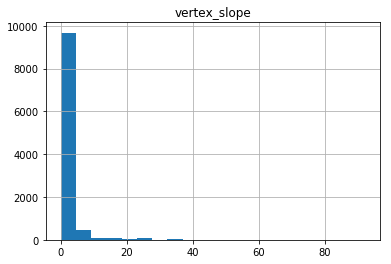

In [63]:
# histogram of slopes between vertexes where slope < 100%

df[df['vertex_slope'] < 100].hist(column='vertex_slope', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10caf4be0>]],
      dtype=object)

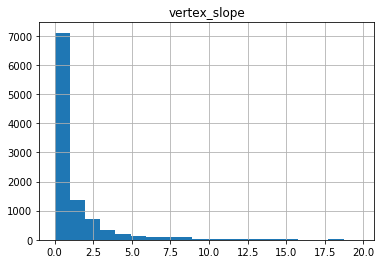

In [64]:
# histogram of slopes between vertexes where slope < 20%
df[df['vertex_slope'] < 20].hist(column='vertex_slope', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e0a9e80>]],
      dtype=object)

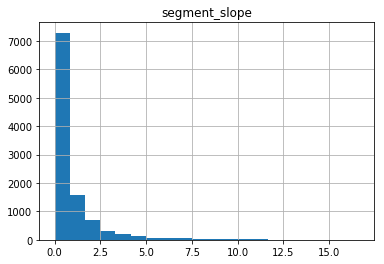

In [65]:
# histogram of segment slopes where slope < 20%
df[df['segment_slope'] < 20].hist(column='segment_slope', bins=20)

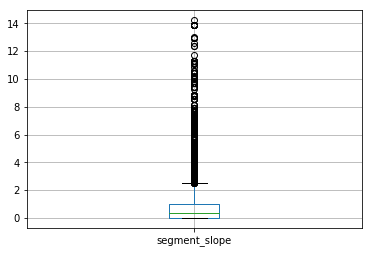

In [66]:
# try a box plot for all salmon, segment slopes less than 15%

df[df['segment_slope'] < 15].boxplot(column=['segment_slope'])

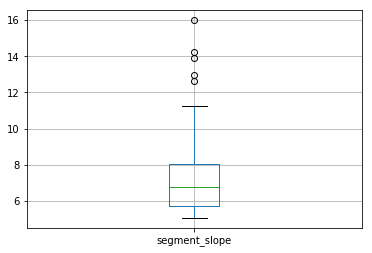

In [67]:
# try coho at 5-15%
df_sp = df[df['species_code'] == 'CH']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

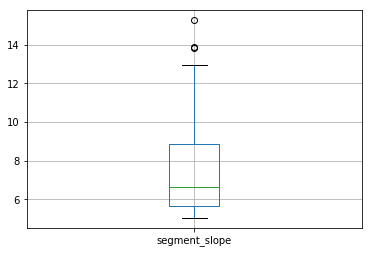

In [68]:
df_sp = df[df['species_code'] == 'CM']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

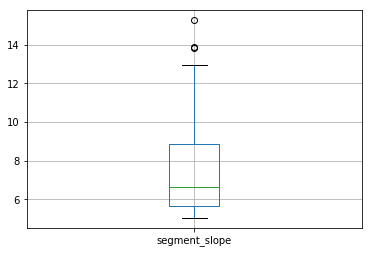

In [69]:
# CM
df_sp = df[df['species_code'] == 'CM']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

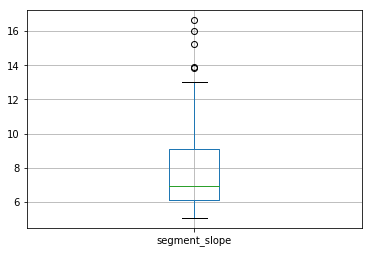

In [70]:
df_sp = df[df['species_code'] == 'CO']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

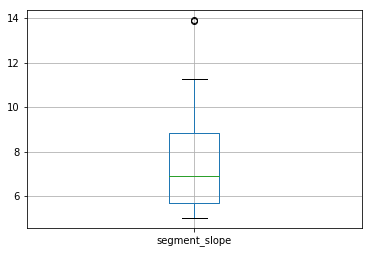

In [71]:
df_sp = df[df['species_code'] == 'PK']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])

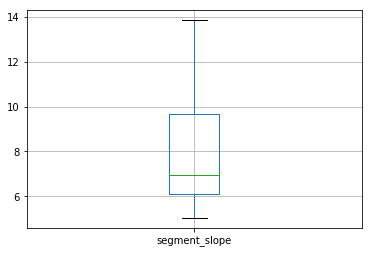

In [72]:
df_sp = df[df['species_code'] == 'SK']
df_sp = df_sp[df_sp['segment_slope'] < 20] 
df_sp = df_sp[df_sp['segment_slope'] > 5] 
df_sp.boxplot(column=['segment_slope'])